<a href="https://colab.research.google.com/github/RiseAboveAll/SVHN_ANN/blob/main/SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Packages

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [2]:
%load_ext tensorboard

In [29]:
from tensorflow.keras.models import load_model, clone_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adagrad,Adam,SGD,RMSprop,Adamax
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard,Callback,LearningRateScheduler
from math import pi, cos, floor
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras import backend

# Loading And Processing Data Set

In [10]:
hf=h5py.File('/content/drive/MyDrive/Projects/SVHN/SVHN_single_grey1.h5','r')
X_train = hf['X_train'][:]
y_train1 = hf['y_train'][:]
X_test = hf['X_test'][:]
y_test1 = hf['y_test'][:]


# Close this file
hf.close()

In [11]:
X_train.shape

(42000, 32, 32)

In [12]:
X_train=X_train.reshape((X_train.shape[0],-1))
X_test=X_test.reshape((X_test.shape[0],-1))


In [13]:
norm=Normalizer()
norm.fit(X_train)
x_train=norm.fit_transform(X_train)
x_test=norm.transform(X_test)

In [14]:
y_train=to_categorical(y_train1)
y_test=to_categorical(y_test1)

In [15]:
x_val=x_train[30000:]
y_val=y_train[30000:]
x_train=x_train[:30000]
y_train=y_train[:30000]


In [16]:
print("Training Set Shape: {0}".format(x_train.shape))
print("Test Set Shape: {0}".format(x_test.shape))

Training Set Shape: (30000, 1024)
Test Set Shape: (18000, 1024)


In [17]:
print("Train Y shape: {0}".format(y_train.shape))
print("Test Y shape: {0}".format(y_test.shape))

Train Y shape: (30000, 10)
Test Y shape: (18000, 10)


In [18]:
num_class=y_train.shape[1]

In [19]:
num_class

10

# Model 1

In [ ]:
model=Sequential()
model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(32,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=Adam(learning_rate=1e-3)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])




In [ ]:
model.summary()

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=200,verbose=1)

In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Model 2

In [ ]:
model=Sequential()
model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(num_class,kernel_initializer='he_uniform',activation='softmax'))
optimizer=Adam(learning_rate=1e-3)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=200,verbose=1)



In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Model 3

In [ ]:
model=Sequential()
model.add(Dense(512,input_shape=(1024,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(num_class,activation='softmax'))
optimizer=Adam(learning_rate=1e-3)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=200,verbose=1)



In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Model 4

In [ ]:
model=Sequential()
model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(num_class,kernel_initializer='he_uniform',activation='softmax'))
optimizer=SGD(learning_rate=1e-3)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=200,verbose=1)



In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Model 5

In [ ]:
Model=Sequential()
Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=SGD(learning_rate=1e-3)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=200,verbose=1)



In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
Adam?

# Model 6

In [ ]:
Model=Sequential()
Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=SGD(learning_rate=1e-3)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=800,verbose=1)



In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Model 7A

In [ ]:
Model=Sequential()
Model.add(Dense(16,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(128,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(512,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(1024,kernel_initializer='he_normal'))
#Model.add(Dropout(.3))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=Adam(learning_rate=1e-5)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,batch_size=300,verbose=0)



In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
Model.evaluate(x_test,y_test)

In [ ]:
Model.evaluate(x_train , y_train)

# Model 7B

In [ ]:
Model=Sequential()
Model.add(Dense(16,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(BatchNormalization())
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(128,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(512,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(1024,kernel_initializer='he_normal'))
#Model.add(Dropout(.3))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=Adam(learning_rate=1e-5)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,batch_size=300,verbose=0)



In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
Model.evaluate(x_test,y_test)

In [ ]:
Model.evaluate(x_train , y_train)

# Model 7AC

In [ ]:
Model=Sequential()
Model.add(Dense(16,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(128,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(512,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(1024,kernel_initializer='he_normal'))
#Model.add(Dropout(.3))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=Adam(learning_rate=1e-5)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150,batch_size=32,verbose=0)



In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
Model.evaluate(x_test,y_test)

In [ ]:
Model.evaluate(x_train , y_train)

# Model 7ACA

In [ ]:
Model=Sequential()
Model.add(Dense(16,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(128,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(512,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(1024,kernel_initializer='he_normal'))
#Model.add(Dropout(.3))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=Adam(learning_rate=1e-5)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=65,batch_size=80,verbose=0)



In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
Model.evaluate(x_test,y_test)
Model.evaluate(x_train , y_train)

# Model 8

In [ ]:
Model=Sequential()
Model.add(Dense(1024,input_shape=(1024,)))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(512))
Model.add(Activation('relu'))
Model.add(Dense(256))
Model.add(Activation('relu'))
Model.add(Dense(128))
Model.add(Activation('relu'))
Model.add(BatchNormalization())
Model.add(Dense(256))
Model.add(Activation('relu'))

Model.add(Dense(512))
Model.add(Activation('relu'))

Model.add(Dense(1024))
Model.add(Activation('relu'))
Model.add(Dropout(.3))
Model.add(Dense(num_class,activation='softmax'))
optimizer=Adam(learning_rate=1e-5)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=Model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=7,batch_size=32,verbose=0)



In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
Model.evaluate(x_test,y_test)
Model.evaluate(x_val,y_val)

Model.evaluate(x_train , y_train)

# Model 9

Start TensorBoard within the notebook using magics:

In [ ]:
%tensorboard --logdir logs

In [ ]:
Model=Sequential()
Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(128,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=Adam(learning_rate=1e-5)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb=TensorBoard(log_dir=logdir,histogram_freq=1,write_images=True)
history=Model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=17,batch_size=32,verbose=0,callbacks=[tb])



In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
Model.evaluate(x_test,y_test)
Model.evaluate(x_val,y_val)

Model.evaluate(x_train , y_train)

# Summary A

- Always keep number of neurons in progression of 2^n

- By adding Batch Normalization in the first hidden layer, it increases the training accuracy or reduces the training loss but test accuracy and loss curve tend to become flatter.

- By adding Dropout in the first hidden layer itself, the loss increases both for training and test , but test set the curve is not flatter , it is oscilating. It means it is bad.

- By adding Dropout before the classification layer have given the best learning curves , in addition adding Batch Norm layer in first hidden layer before activation function, it speeded up the convergence and also has decreased the training and test loss

- If we add Batch Normalization layer after the activation , the training and test loss increases but slightly better generalization is there.

- Making the network wider decreases the train and test loss , network has 7 layers, earlier it had units of 8,16,32,64,128,256,512 . We made it wide by 16,32,64,128,256,512,1024.

- [7AC]Decrease in Batch Size to 32 from 200 takes lot of time to learn, probably need larger learning rate than 1E-5, though performance is bit good, but we can increase the number of epochs , there is still scope of improvement 

- We can see after increasing the number of epochs from 100 to 150 , we find convergence around 110-120, and increase in train and validation accuracy

- [7ACA]Increasing the batch size fastens the learning , aat around 60th epoch model converges, it generalizes well but slightly decrease in model performance. Hence we reduce the epochs from 80 to 60. We can see better generalization but comparatively less accuracy.

- [7BC] We have noticed with smaller batchsize , batchnormalization should be used post activation layer

- It is validated that 1E-5 i the apt loss with adam optimizer

- [Model 8] it is in form of large-small-large unit like bottle neck model. It takes lesser time to learn, i.e around epoch 6th or 7th it conerges at batch size of 32. But it does not have smooth learning as compared to previous models.

- [Model 9] It is in form of inverted V , it has good learning , though comparatively to others takes time to learn , converges at around 25th epoch, but has similar performance(When using Batch Norm after activation layer). Have found using batch norm before activation layer fastens the learning and increases the performance also , it converges around 15th epoch. It has smoother learning also  

# Tensorboard

In [ ]:
Model=Sequential()
Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
Model.add(BatchNormalization())
Model.add(Activation('relu'))
Model.add(Dense(256,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(128,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(64,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(32,kernel_initializer='he_normal'))
Model.add(Activation('relu'))
Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
optimizer=Adam(learning_rate=1e-5)
Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb=TensorBoard(log_dir=logdir,histogram_freq=1,write_images=True)
history=Model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=17,batch_size=32,verbose=0,callbacks=[tb])



# Weight Ensemble

In [ ]:
os.chdir('/content/drive/MyDrive/Projects/')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Projects'

In [ ]:
#os.makedirs('Model')

In [ ]:

os.chdir('/content/drive/MyDrive/Projects/Stacked_Model/')

In [ ]:
def create_model():
  Model=Sequential()
  Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
  Model.add(BatchNormalization())
  Model.add(Activation('relu'))
  Model.add(Dense(256,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(128,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(64,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(32,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
  optimizer=Adam(learning_rate=1e-5)
  Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  return Model

In [ ]:
mod=create_model()

In [ ]:
num_epochs,save_after=10,5
for i in range(num_epochs):
  mod.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=17,batch_size=32,verbose=0)
  if i>=save_after:
    mod.save('model_'+str(i)+'.h5')

In [ ]:
def load_models(n_start,n_end):
  all_models=list()
  for epoch in range(n_start,n_end):
    filename='model_'+str(epoch)+'.h5'

    model=load_model(filename)
    print('loaded file {}'.format(filename))
    all_models.append(model)
  return all_models

In [ ]:
members=load_models(n_start=5,n_end=10)

loaded file model_5.h5
loaded file model_6.h5
loaded file model_7.h5
loaded file model_8.h5
loaded file model_9.h5


In [ ]:
def weight_ensemble(members,weighs):
  n_layers=len(members[0].get_weights())
  avg_weights=[]
  for layer in range(n_layers):
    layer_weight=np.array([model.get_weights()[layer] for model in members])
    avg_layer_weight=np.average(layer_weight,axis=0,weights=weighs)
    avg_weights.append(avg_layer_weight)
  model=clone_model(members[0])
  model.set_weights(avg_weights)
  optimizer=Adam(learning_rate=1e-5)
  model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  return model


In [ ]:
n_models=len(members)

In [ ]:
#Linear Weight Decay
weighs=[i/n_models for i in range(n_models,0,-1)]

In [ ]:
#Exponential Weight Decay
alpha=2
weighs=[float(np.exp(-i/alpha)) for i in range(1,n_models+1) ]

In [ ]:
weighs

[0.6065306597126334,
 0.36787944117144233,
 0.22313016014842982,
 0.1353352832366127,
 0.0820849986238988]

In [ ]:
model=weight_ensemble(members,weighs)

In [ ]:
len(members)

5

In [ ]:
def eval_n_members(members,n_members,x_train,y_train,x_val,y_val):
  
  sub=members[:n_members]
  w=[i/n_models for i in range(n_members,0,-1) ]
  model=weight_ensemble(sub,w)
  _,train_acc=model.evaluate(x_train,y_train,verbose=0)
  _,val_acc=model.evaluate(x_val,y_val,verbose=0)
  return train_acc,val_acc


In [ ]:
members=list(reversed(members))
Single_sc_t,Single_sc_v,ens_sc_t,ens_sc_v=[],[],[],[]
for i in range(1,len(members)+1):
  en_sc_t,en_sc_v=eval_n_members(members,i,x_train,y_train,x_val,y_val)
  _,single_sc_t=members[i-1].evaluate(x_train,y_train,verbose=0)
  _,single_sc_v=members[i-1].evaluate(x_val,y_val,verbose=0)
  print('>%d single training = %.3f,ensemble training = %.3f, single validation =%.3f, ensemble validation = %.3f'%(i,single_sc_t,en_sc_t,single_sc_v,en_sc_v))
  ens_sc_t.append(en_sc_t)
  ens_sc_v.append(en_sc_v)
  Single_sc_t.append(single_sc_t)
  Single_sc_v.append(single_sc_v)


>1 single training = 0.988,ensemble training = 0.988, single validation =0.835, ensemble validation = 0.835
>2 single training = 0.979,ensemble training = 0.987, single validation =0.829, ensemble validation = 0.836
>3 single training = 0.984,ensemble training = 0.988, single validation =0.840, ensemble validation = 0.838
>4 single training = 0.973,ensemble training = 0.987, single validation =0.834, ensemble validation = 0.839
>5 single training = 0.965,ensemble training = 0.987, single validation =0.838, ensemble validation = 0.840


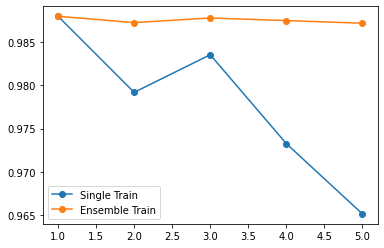

In [ ]:
x_axis = [i for i in range(1, len(members)+1)]
plt.plot(x_axis, Single_sc_t, marker='o',label='Single Train')
plt.plot(x_axis, ens_sc_t, marker='o',label='Ensemble Train')

plt.legend()
plt.show()


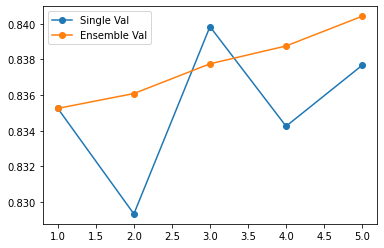

In [ ]:
x_axis = [i for i in range(1, len(members)+1)]
plt.plot(x_axis, Single_sc_v, marker='o',label='Single Val')
plt.plot(x_axis, ens_sc_v, marker='o',label='Ensemble Val')
plt.legend()

- We can see with any weight averaging , i.e holistic weighing , linear weigh decay averaginf , exponential weigh decay averaging, models work well on training but does not generalize well on validation set

# Stacked Model

In [ ]:
#os.chdir('/content/drive/MyDrive/Projects/')
#os.makedirs('Stacked_Model')
os.chdir('/content/drive/MyDrive/Projects/Stacked_Model/')

In [ ]:
def create_model(x_train,y_train,x_val,y_val):
  Model=Sequential()
  Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
  Model.add(BatchNormalization())
  Model.add(Activation('relu'))
  Model.add(Dense(256,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(128,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(64,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(32,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
  optimizer=Adam(learning_rate=1e-5)
  Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  Model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=17,batch_size=32,verbose=0)
  return Model

In [ ]:
n_members=10
for i in range(n_members):
  model=create_model(x_train,y_train,x_val,y_val)
  filename='model_'+str(i)+'.h5'
  
  model.save(filename)

In [ ]:
def load_models(n_models):
  all_models=list()
  for i in range(n_models):
    filename='model_'+str(i)+'.h5'
    model=load_model(filename)
    all_models.append(model)
  return all_models

In [ ]:
members=load_models(n_members)

In [ ]:
len(members)

10

In [ ]:
#Individual Sub Model Accuracy
for model in members:
  _,tacc=model.evaluate(x_train,y_train,verbose=0)
  _,vacc=model.evaluate(x_val,y_val,verbose=0)
  print("Train Accuracy : %.3f, Validation Accuarcy : %.3f"%(tacc,vacc))

Train Accuracy : 0.801, Validation Accuarcy : 0.765
Train Accuracy : 0.802, Validation Accuarcy : 0.769
Train Accuracy : 0.802, Validation Accuarcy : 0.763
Train Accuracy : 0.801, Validation Accuarcy : 0.763
Train Accuracy : 0.804, Validation Accuarcy : 0.770
Train Accuracy : 0.797, Validation Accuarcy : 0.759
Train Accuracy : 0.798, Validation Accuarcy : 0.760
Train Accuracy : 0.788, Validation Accuarcy : 0.754
Train Accuracy : 0.794, Validation Accuarcy : 0.758
Train Accuracy : 0.801, Validation Accuarcy : 0.760


In [ ]:
def define_stacked_model(members):
  for i in range(len(members)):
    model=members[i]
    for layer in model.layers:
      layer.trainable=False
      layer._name='ens_'+str(i)+'_'+layer.name
  ens_vis=[model.input for model in members]
  ens_op=[model.output for model in members]
  merge=concatenate(ens_op)
  hid=Dense(64,kernel_initializer='he_normal')(merge)
  batch=BatchNormalization()(hid)
  act_1=Activation('relu')(batch)
  hid_1=Dense(32,activation='relu',kernel_initializer='he_normal')(act_1)
  hid_2=Dense(16,activation='relu',kernel_initializer='he_normal')(hid_1)
  out=Dense(num_class,activation='softmax',kernel_initializer='he_normal')(hid_2)
  model=Model(inputs=ens_vis,outputs=out)
  optimizer=Adam(learning_rate=5e-4)
  model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  return model




In [ ]:
stack_m=define_stacked_model(members)

In [ ]:
len(stack_m.input)

10

In [ ]:
def fit_model(model,x_train,y_train,x_val,y_val):
  tx=[x_train for _ in range(len(model.input))]
  txv=[x_val for _ in range(len(model.input))]
  history=model.fit(tx,y_train,validation_data=(txv,y_val),epochs=5,batch_size=32,verbose=0)
  return history


In [ ]:
history=fit_model(stack_m,x_val,y_val,x_test,y_test)

Minimum validation loss: 0.6974653005599976


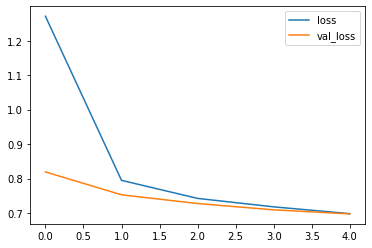

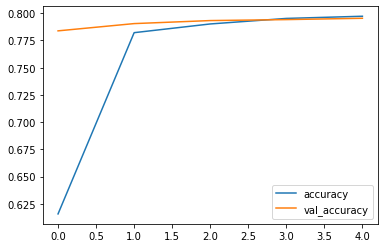

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
def pred(model,x_train):
  tx=[x_train for _ in range(len(model.input))]
  return model.predict(tx,verbose=0)

In [50]:
ytrain1=y_train1[:30000]
yval=y_train1[30000:]

In [ ]:
yhat=pred(stack_m,x_test)
yhat=np.argmax(yhat,axis=1)
acc=accuracy_score(y_test1,yhat)


In [ ]:
acc

0.7953888888888889

In [ ]:
yhatv=pred(stack_m,x_val)
yhatv=np.argmax(yhatv,axis=1)
acc=accuracy_score(yval,yhatv)

In [ ]:
acc

0.805

# Horizontal Voting

In [ ]:
def create_model():
  Model=Sequential()
  Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
  Model.add(BatchNormalization())
  Model.add(Activation('relu'))
  Model.add(Dense(256,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(128,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(64,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(32,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
  optimizer=Adam(learning_rate=1e-5)
  Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  
  return Model

In [ ]:
os.chdir('/content/drive/MyDrive/Projects/SVHN/')
os.makedirs('horizontal_models')
os.chdir('/content/drive/MyDrive/Projects/SVHN/horizontal_models/')

In [ ]:
model=create_model()
n_epochs,save_after=100,90
for i in range(n_epochs):
  model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=4,batch_size=32,verbose=0)
  if i>=save_after:
    filename='model_'+str(i)+'.h5'
    model.save(filename)
  

In [ ]:
def load(n_start,n_end):
  all_models=list()
  for epoch in range(n_start,n_end):
    filename='model_'+str(epoch)+'.h5'
    model=load_model(filename)
    all_models.append(model)
  return all_models

In [ ]:
members=load(90,100)
members=list(reversed(members))

In [ ]:
def pred(members,data):
  yhat=[model.predict(data) for model in members]
  yhat=np.array(yhat)
  summed=np.sum(yhat,axis=0)
  result=np.argmax(summed,axis=1)
  return result

In [ ]:
yhat=pred(members,x_val)

In [ ]:
accuracy_score(yval,yhat)

0.83775

In [ ]:
yhatt=pred(members,x_test)

In [ ]:
accuracy_score(y_test1,yhatt)

0.8356666666666667

In [ ]:
tyahat=pred(members,x_train)

In [ ]:
accuracy_score(ytrain1,tyahat)

0.9998333333333334

# Snapshot Ensemble

In [41]:
os.getcwd()

'/content/drive/MyDrive/Projects/SVHN/SnapshotLearning'

In [40]:
os.chdir('/content/drive/MyDrive/Projects/SVHN/SnapshotLearning/')

In [42]:
class SnapshotEnsemble(Callback):
  def __init__(self, n_epochs,n_cycles,lrate_max,verbose=0):
    self.epochs = n_epochs
    self.cycles = n_cycles
    self.lr_max =lrate_max
    self.lrates=list()
  def cosine_annealing(self,epoch,n_epochs,n_cycles,lrate_max):
    epochs_per_cycle = floor(n_epochs / n_cycles)
    cos_inner=(pi * (epoch % epochs_per_cycle))/(epochs_per_cycle)
    return (lrate_max/2)*(cos(cos_inner)+1)
  def on_epoch_begin(self,epoch,log={}):
    lr=self.cosine_annealing(epoch,self.epochs,self.cycles,self.lr_max)
    backend.set_value(self.model.optimizer.lr,lr)
    self.lrates.append(lr)
  def on_epoch_end(self,epochs,logs={}):
    epochs_per_cycle=floor(self.epochs/self.cycles)
    if epochs!=0 and (epochs + 1) == 0:
      f='sm_%d.h5'%int((epoch+1)/epochs_per_cycle)
      self.model.save(f)
      print('>saved %s , epochs %d' %(f,epochs))



In [43]:
class SnapshotEnsemble(Callback):
	# constructor
	def __init__(self, n_epochs, n_cycles, lrate_max, verbose=0):
		self.epochs = n_epochs
		self.cycles = n_cycles
		self.lr_max = lrate_max
		self.lrates = list()
 
	# calculate learning rate for epoch
	def cosine_annealing(self, epoch, n_epochs, n_cycles, lrate_max):
		epochs_per_cycle = floor(n_epochs/n_cycles)
		cos_inner = (pi * (epoch % epochs_per_cycle)) / (epochs_per_cycle)
		return lrate_max/2 * (cos(cos_inner) + 1)
 
	# calculate and set learning rate at the start of the epoch
	def on_epoch_begin(self, epoch, logs={}):
		# calculate learning rate
		lr = self.cosine_annealing(epoch, self.epochs, self.cycles, self.lr_max)
		# set learning rate
		backend.set_value(self.model.optimizer.lr, lr)
		# log value
		self.lrates.append(lr)
 
	# save models at the end of each cycle
	def on_epoch_end(self, epoch, logs={}):
		# check if we can save model
		epochs_per_cycle = floor(self.epochs / self.cycles)
		if epoch != 0 and (epoch + 1) % epochs_per_cycle == 0:
			# save model to file
			filename = "snapshot_model_%d.h5" % int((epoch + 1) / epochs_per_cycle)
			self.model.save(filename)
			print('>saved snapshot %s, epoch %d' % (filename, epoch))

In [44]:
def create_model():
  Model=Sequential()
  Model.add(Dense(512,input_shape=(1024,),kernel_initializer='he_normal'))
  Model.add(BatchNormalization())
  Model.add(Activation('relu'))
  Model.add(Dense(256,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(128,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(64,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(32,kernel_initializer='he_normal'))
  Model.add(Activation('relu'))
  Model.add(Dense(num_class,kernel_initializer='he_normal',activation='softmax'))
  optimizer=Adam()
  Model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  
  return Model

In [53]:
model=create_model()
n_epochs=500
n_cycles=50
ca=SnapshotEnsemble(n_epochs=n_epochs,n_cycles=n_cycles,lrate_max=1e-5)
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=n_epochs,batch_size=32,verbose=0,callbacks=[ca])


>saved snapshot snapshot_model_1.h5, epoch 9
>saved snapshot snapshot_model_2.h5, epoch 19
>saved snapshot snapshot_model_3.h5, epoch 29
>saved snapshot snapshot_model_4.h5, epoch 39
>saved snapshot snapshot_model_5.h5, epoch 49
>saved snapshot snapshot_model_6.h5, epoch 59
>saved snapshot snapshot_model_7.h5, epoch 69
>saved snapshot snapshot_model_8.h5, epoch 79
>saved snapshot snapshot_model_9.h5, epoch 89
>saved snapshot snapshot_model_10.h5, epoch 99
>saved snapshot snapshot_model_11.h5, epoch 109
>saved snapshot snapshot_model_12.h5, epoch 119
>saved snapshot snapshot_model_13.h5, epoch 129
>saved snapshot snapshot_model_14.h5, epoch 139
>saved snapshot snapshot_model_15.h5, epoch 149
>saved snapshot snapshot_model_16.h5, epoch 159
>saved snapshot snapshot_model_17.h5, epoch 169
>saved snapshot snapshot_model_18.h5, epoch 179
>saved snapshot snapshot_model_19.h5, epoch 189
>saved snapshot snapshot_model_20.h5, epoch 199
>saved snapshot snapshot_model_21.h5, epoch 209
>saved snaps

In [63]:
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models,50,1):
		# define filename for this ensemble
		filename = 'snapshot_model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
  
	return all_models

In [47]:
def pred(members,x):
  members=list(reversed(members))
  yhat=[model.predict(x) for model in members]
  yhat=np.array(yhat)
  summed=np.sum(yhat,axis=0)
  result=np.argmax(summed,axis=1)
  return result

In [48]:
def eval_n_members(members,n_members,x,y):
  members=list(reversed(members))
  sub=members[:n_members]
  yhat=pred(sub,x)
  return accuracy_score(y,yhat)

In [64]:
members=load_all_models(10)

>loaded snapshot_model_11.h5
>loaded snapshot_model_12.h5
>loaded snapshot_model_13.h5
>loaded snapshot_model_14.h5
>loaded snapshot_model_15.h5
>loaded snapshot_model_16.h5
>loaded snapshot_model_17.h5
>loaded snapshot_model_18.h5
>loaded snapshot_model_19.h5
>loaded snapshot_model_20.h5
>loaded snapshot_model_21.h5
>loaded snapshot_model_22.h5
>loaded snapshot_model_23.h5
>loaded snapshot_model_24.h5
>loaded snapshot_model_25.h5
>loaded snapshot_model_26.h5
>loaded snapshot_model_27.h5
>loaded snapshot_model_28.h5
>loaded snapshot_model_29.h5
>loaded snapshot_model_30.h5
>loaded snapshot_model_31.h5
>loaded snapshot_model_32.h5
>loaded snapshot_model_33.h5
>loaded snapshot_model_34.h5
>loaded snapshot_model_35.h5
>loaded snapshot_model_36.h5
>loaded snapshot_model_37.h5
>loaded snapshot_model_38.h5
>loaded snapshot_model_39.h5
>loaded snapshot_model_40.h5
>loaded snapshot_model_41.h5
>loaded snapshot_model_42.h5
>loaded snapshot_model_43.h5
>loaded snapshot_model_44.h5
>loaded snapsh

In [66]:
single_scores, ensemble_scores = list(), list()
for i in range(1, 10):
	# evaluate model with i members
	ensemble_score = eval_n_members(members, i, x_train, ytrain1)
	# evaluate the i'th model standalone
	
	_, single_score = members[i-1].evaluate(x_train, y_train, verbose=0)
	# summarize this step
	print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
	ensemble_scores.append(ensemble_score)
	single_scores.append(single_score)

> 1: single=0.930, ensemble=0.999
> 2: single=0.938, ensemble=0.999
> 3: single=0.945, ensemble=0.999
> 4: single=0.952, ensemble=0.999
> 5: single=0.958, ensemble=0.999
> 6: single=0.963, ensemble=0.999
> 7: single=0.968, ensemble=0.999
> 8: single=0.971, ensemble=0.999
> 9: single=0.975, ensemble=0.999


In [67]:
single_scores, ensemble_scores = list(), list()
for i in range(1, 10):
	# evaluate model with i members
	ensemble_score = eval_n_members(members, i, x_val, yval)
	# evaluate the i'th model standalone
	
	_, single_score = members[i-1].evaluate(x_val, y_val, verbose=0)
	# summarize this step
	print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
	ensemble_scores.append(ensemble_score)
	single_scores.append(single_score)

> 1: single=0.833, ensemble=0.839
> 2: single=0.836, ensemble=0.840
> 3: single=0.836, ensemble=0.839
> 4: single=0.838, ensemble=0.839
> 5: single=0.838, ensemble=0.839
> 6: single=0.840, ensemble=0.839
> 7: single=0.839, ensemble=0.839
> 8: single=0.840, ensemble=0.839
> 9: single=0.839, ensemble=0.839


# Summary B

- We tried different types of ensembling methods for neural network , where in we found out only stacked neural network has given us the best generalization , others like horizontal or weight average or snapshot ensemble have issue of overfitting 